In [22]:
_ = """
https://fivethirtyeight.com/features/how-long-most-parents-wait-between-children/
dob mother child dataset
  Linking Maternal and Child Health Data to 
  Developing a Maternally Linked Birth Dataset to Study
  Linking Data for Mothers and Babies in De-Identified

https://ardisdataset.github.io/SHIBR/

https://datasetsearch.research.google.com
birth registers -site:kaggle.com


https://www.kaggle.com/datasets/simonburton/wikipedia-people-network

xxx: Тут подметил, что разница между днями рождения большей половины моих знакомых и одного из их родителей примерно одинакова. 9 месяцев.


birts? https://www.kaggle.com/datasets/fivethirtyeight/fivethirtyeight
https://fivethirtyeight.com/features/how-long-most-parents-wait-between-children/

>>> len(data)
1_259_410
>>> len(people_dobs)
643_807
>>> print(len(pairs))
16400


first second child age difference statistics
There is a gap of 13 to 24 months between first and second child for 17.5 percent of Americans and a gap of 25 to 36 months for 17.2 percent of Americans.

According to the U.K.’s Office for National Statistics, that period is longer between a second and third child (41 months) but similar to the gap between a third and fourth child (37 months). None of those figures has changed much over the past 10 years.

>>> years[0]
266
>>> years[1]
401
>>> years[2]
788
>>> years[3]
740


"""

In [23]:
import json
from datetime import datetime, timedelta
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import random

In [24]:
SAME_FAMILY_NAME_THRESHOLD = 2

In [25]:
with open('output.json') as f:
    data = json.load(f)

def family_name(name):
    name = name.split('_(')[0]
    name = name.split('_')
    for i in reversed(name):
        if not i.startswith('(') and i not in set(['Sr.', 'Jr.']):
            return i
    return name

def parse_dob(dob):
    str_dob = ' '.join(map(str, dob))  # [2003, 'sep', 21] -> '2003 sep 21'
    dt = datetime.strptime(str_dob, '%Y %b %d')
    return dt

In [26]:
family_names = Counter()
for p in data:
    family_names[family_name(p['name'])] += 1

In [27]:
people_dobs = {}
people_links = {}
for p in data:
    people_links[p['name']] = p['links']
    if all(p['dob']):
        people_dobs[p['name']] = p['dob']

In [28]:
c = 0
pairs = defaultdict(list)
for p in data:
    if all(p['dob']):
        name = p['name']
        fn = family_name(name)
        if 1 < family_names[fn] <= SAME_FAMILY_NAME_THRESHOLD:
            pairs[fn].append(name)
            c += 1

for fn in list(pairs.keys()):
    if len(pairs[fn]) < 2:
        del pairs[fn]

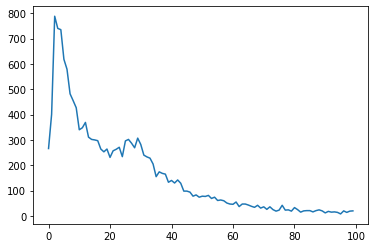

In [29]:
bad = 0
years = Counter()
for fn in pairs:
    try:
        p1, p2 = pairs[fn]
        dob1 = parse_dob(people_dobs[p1])
        dob2 = parse_dob(people_dobs[p2])
        year_delta = int(abs((dob1-dob2).days // 365.25))
        years[year_delta] += 1
    except:
        #print('ERROR', p1, people_dobs[p1], p2, people_dobs[p2])
        bad += 1
        pass

# years.most_common(10)  (2, 788), (3, 740), (4, 735), (5, 618), (6, 579), (7, 482), (8, 455), (9, 427), (1, 401), (12, 369),

plt.plot([years[i] for i in range(100)])
#plt.ylabel('some numbers')
plt.show()

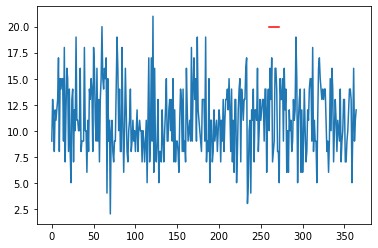

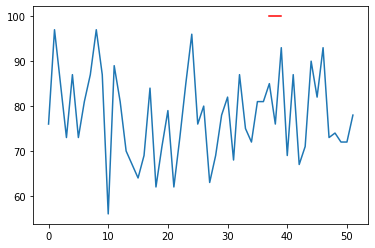

In [30]:
days = Counter()
weeks = Counter()
for fn in pairs:
    try:
        p1, p2 = pairs[fn]
        dob1 = parse_dob(people_dobs[p1])
        dob2 = parse_dob(people_dobs[p2])
        year_delta = int(abs((dob1-dob2).days // 365.25))
        if 20 <= year_delta <= 35:
            days_delta = int((dob1-dob2).days % 365.25)
            days[days_delta] += 1
            weeks[days_delta//7] += 1
    except:
        #print('ERROR', p1, people_dobs[p1], p2, people_dobs[p2])
        pass

plt.plot([days[i] for i in range(365)])
plt.plot([20 if 7*37<i<7*39 else None for i in range(365)], color='r')
plt.show()
plt.plot([weeks[i] for i in range(52)])
plt.plot([100 if 37<=i<=39 else None for i in range(52)], color='r')
plt.show()

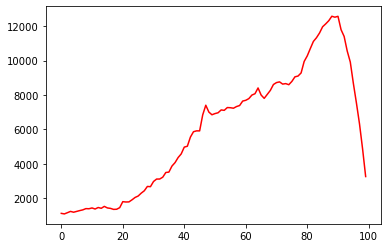

174


In [31]:
#for p,d in biographies:
years_c = Counter()
for p in data:
    if all(p['dob']):
        try:
            d = parse_dob(p['dob'])
            years_c[d.year] += 1 
        except:
            pass

plt.plot([years_c[i] for i in range(1900,2000)], color='r')
plt.show()
print(len(years_c))

In [32]:
_="""
https://datasets.imdbws.com/name.basics.tsv.gz  no day-month
https://www.imdb.com/interfaces/

bios https://konstantingreger.net/scraping-the-imdb-for-use-in-tableau/  ftp://ftp.fu-berlin.de/pub/misc/movies/database/

-------------------------------------------------------------------------------

RN: Craig Wesley Sams III

NK: Lil Craig

DB: 20 December 1982, Las Vegas, Nevada, USA
"""

In [ ]:
biographies = []
rn = None
db = None
with open('biographies.list', encoding='latin-1', errors='ignore') as f:
    for line in f.readlines():
        #print(line)
        if line.startswith('RN: '):
            rn = line.strip()[4:]
        if line.startswith('DB: '):
            try:
                v = line.strip()[4:]
                v = v.split(',')[0]
                #print(v)
                db = datetime.strptime(v, '%d %B %Y')
                #print('ok', rn)
            except:
                pass
        if '-------------------------------' in line:
            if rn and db:
                biographies.append((rn, db))
            rn = None
            db = None

In [ ]:
len(biographies)

In [ ]:
print(len(set([i[0] for i in biographies])))
print(len(set([i[0] for i in biographies])))
print(len(set([family_name(i[0]) for i in biographies])))

In [ ]:
biographies[::1000]
def family_name(nm):
    if ',' in nm:
        return nm.split(',')[0]
    return nm.split(' ')[-1]

In [ ]:
family_names = Counter()
for p,_ in biographies:
    family_names[family_name(p)] += 1

In [ ]:
people_dobs = {}
for p,d in biographies:
    people_dobs[p] = d

In [ ]:
c = 0
pairs = defaultdict(list)
for p,d in biographies:
    name = p
    fn = family_name(name)
    if 1 < family_names[fn] <= SAME_FAMILY_NAME_THRESHOLD:
        pairs[fn].append(name)
        c += 1

for fn in list(pairs.keys()):
    if len(pairs[fn]) < 2:
        del pairs[fn]

In [ ]:


        #print('ERROR', p1, people_dobs[p1], p2, people_dobs[p2])
        bad += 1
        pass

# years.most_common(10)  (2, 788), (3, 740), (4, 735), (5, 618), (6, 579), (7, 482), (8, 455), (9, 427), (1, 401), (12, 369),

plt.plot([years[i] for i in range(100)])
#plt.ylabel('some numbers')
plt.show()

In [ ]:
days = Counter()
weeks = Counter()
for fn in pairs:
    try:
        p1, p2 = pairs[fn]
        dob1 = (people_dobs[p1])
        dob2 = (people_dobs[p2])
        year_delta = int(abs((dob1-dob2).days // 365.25))
        if 20 <= year_delta <= 35:
            days_delta = int((dob1-dob2).days % 365.25)
            days[days_delta] += 1
            weeks[days_delta//7] += 1
    except:
        #print('ERROR', p1, people_dobs[p1], p2, people_dobs[p2])
        pass

plt.plot([days[i] for i in range(365)])
plt.plot([20 if 7*37<i<7*39 else None for i in range(365)], color='r')
plt.show()
plt.plot([weeks[i] for i in range(52)])
plt.plot([30 if 37<=i<=39 else None for i in range(52)], color='r')
plt.show()

In [ ]:
sum(days.values())

In [ ]:
#for p,d in biographies:
years_c = Counter()
for _, d in biographies:
    years_c[d.year] += 1 

plt.plot([years_c[i] for i in range(1900,2000)], color='r')
plt.show()

In [ ]:
years_c

In [ ]:
years_l = []
for _, d in biographies:
    years_l.append(d.year)

# (0.13, 0.26, 26, 7, 1.7, 0.7)
k1=k2=k3=0
c = Counter()
for i in range(100_000):
    s = random.random()
    if s<0.15:
        c[int(random.gauss(27, 7))]+=1
        k1+=1
    elif s<0.41:
        a = int(random.lognormvariate(1.7, 0.7))
        c[a]+=1
        k2+=1
    else:
        a = random.choice(years_l)
        b = random.choice(years_l)
        c[int(abs(a-b))] += 1
        k3+=1

r = sum([years[i] for i in range(100)]) / sum([c[i] for i in range(100)])
print(k1,k2,k3)

plt.plot([years[i] for i in range(100)], c='r')
plt.plot([c[i]*r for i in range(100)], c='b')
plt.show()

In [ ]:
"""
elif s<0.18:
    c[int(random.gauss(3, 1))]+=1
elif s<0.27:
    c[int(random.gauss(7, 2))]+=1
elif s<0.32:
    c[int(random.gauss(15, 2))]+=1
"""
#if False:
#    pass

In [ ]:
def cc(q_,w_,a_,b_,c_,d_):
    random.seed(0)
    c = Counter()
    for i in range(10_000):
        s = random.random()
        if s<q_:
            c[int(random.gauss(a_, b_))]+=1
        elif s<(q_+w_):
            a = int(random.lognormvariate(c_, d_))
            c[a]+=1
        else:
            a = random.choice(years_l)
            b = random.choice(years_l)
            c[int(abs(a-b))] += 1
    r = sum([years[i] for i in range(100)]) / sum([c[i] for i in range(100)])
    aa = [years[i] for i in range(100)]
    bb = [c[i]*r for i in range(100)]
    err = [abs(aa[i]-bb[i])**2 for i in range(100)]
    return sum(err)

res = []
vv = 0
for a in [25,26,27,28,29,30]:
    for b in [3,4,5,6,7]:
        for c in [1.4,1.5,1.6,1.7,1.8,1.9]:
            for d in [0.5, 0.6, 0.7, 0.8, 0.9]:
                for q in [0.08,0.09,0.10,0.11,0.12,0.13]:
                    for w in [0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26]:
                        res.append((cc(q, w, a,b,c,d), (q, w, a,b,c,d)))
                        vv += 1
                        if vv%1000 == 0:
                            print(vv)

In [ ]:
res2=sorted(res, key=lambda v: v[0])
res2[0], res2[-1]

In [ ]:
cc(0.11, 0.21, 28, 5, 1.6, 0.7)

In [ ]:
for a, b in res:
    if b == (0.11, 0.21, 28, 5, 1.6, 0.7):
        print(a, b)

print(len(res))

In [ ]:
list(pairs.keys())[::1000]

In [ ]:
for i in list(pairs.keys()): #[::1000]:
    a,b = pairs[i]
    if abs(people_dobs[a][0]-people_dobs[b][0])==2:
        print(i, a, b, people_dobs[a],people_dobs[b])

In [ ]:
"""
TODO
WIFE HUSBAND EXCLUDE

proper high SAME_FAMILY_NAME_THRESHOLD
change of koeffs in quarter centuries
triplets with father

distribution of familynames   is it different from common

sons - is it males  in sons peak
    in bios - by his her usage   he she
    male female names list  in output.json

actor life longevity distribution

triplts  dinasties
"""

In [ ]:
max([i[0] for i in people_dobs.values()])